 Implementing a LeNet-5 model using TensorFlow to classify handwritten digits from the MNIST dataset

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, losses
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()

In [7]:

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x = train_x/255
test_x = test_x/255

In [8]:
train_x = np.expand_dims(train_x, 3)
test_x = np.expand_dims(test_x, 3)

In [9]:
val_x = train_x[:5000]
val_y = train_y[:5000]

In [11]:

lenet_5_model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=train_x[0].shape,padding='same'),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='tanh',padding='valid'),
    layers.AveragePooling2D(pool_size=(2, 2)),
    layers.Conv2D(120, kernel_size=(5, 5), activation='tanh'),
    layers.Flatten(),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])
lenet_5_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [13]:
history = lenet_5_model.fit(train_x, train_y, batch_size=64, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 39ms/step - accuracy: 0.9284 - loss: 0.2349 - val_accuracy: 0.9720 - val_loss: 0.0994
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9686 - loss: 0.1020 - val_accuracy: 0.9810 - val_loss: 0.0686
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9789 - loss: 0.0673 - val_accuracy: 0.9884 - val_loss: 0.0435
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9849 - loss: 0.0500 - val_accuracy: 0.9910 - val_loss: 0.0349
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9886 - loss: 0.0363 - val_accuracy: 0.9904 - val_loss: 0.0385


In [14]:
test_loss, test_acc = lenet_5_model.evaluate(test_x, test_y)

print(f'Test accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9767 - loss: 0.0670
Test accuracy: 0.9797000288963318
Test Loss: 0.05878153815865517


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
7


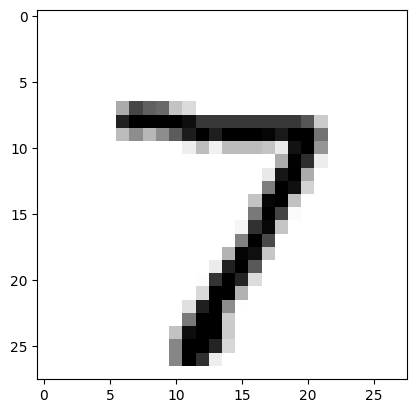

In [15]:
predictions = lenet_5_model.predict(test_x)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_x[0].reshape(28,28),cmap=plt.cm.binary)
plt.show()

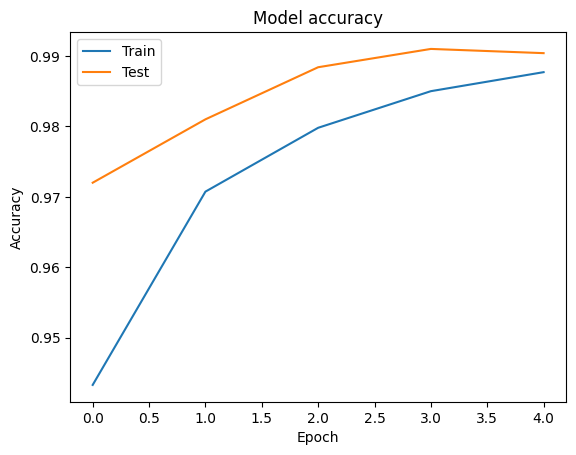

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

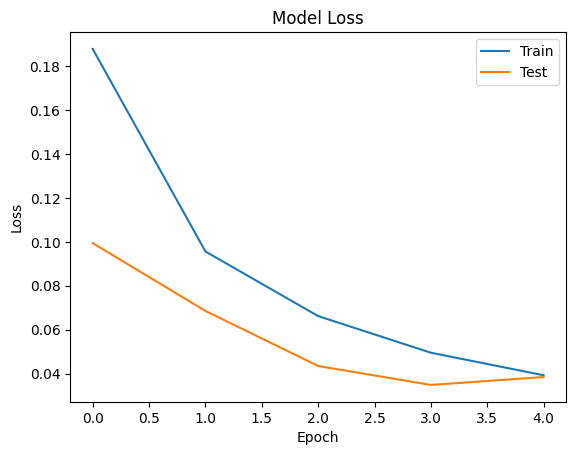

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper right')
plt.show()

